In [1]:
import numpy as np
from dynamicSceneGenerator import DynamicSceneGenerator
from visualize import visualize_dynamic_scene, visualize_camera_pose_in_dsg, visualize_projections, visualize_bounding_boxes, visualize_distorted_bounding_boxes
from visualize import visualize_dynamic_scene_mov, visualize_camera_pose_in_dsg_mov, visualize_projections_mov, visualize_bounding_boxes_mov, visualize_distorted_bounding_boxes_mov
from MODSIM import create_and_place_simple_legacy_camera, project_all_points_from_json, project_all_points, create_all_bbs_from_json, create_dynamic_scene_with_random_tracks 
from utils import find_path_to_next_simulation
from errorGenerator import ErrorGenerator

# Might need to pip install json, json_stream, as they are not default libraries
import json
import os


In [2]:
# Find folder to save simultation trial to
simulation_folder = find_path_to_next_simulation()

In [3]:
# Generate dynamic scene with random tracks
dsg = create_dynamic_scene_with_random_tracks(6, writeToJson=True, path=simulation_folder)

Moviepy - Building video ./simulations/0/dynamicScene.mp4.
Moviepy - Writing video ./simulations/0/dynamicScene.mp4



Moviepy - Done !
Moviepy - video ready ./simulations/0/dynamicScene.mp4


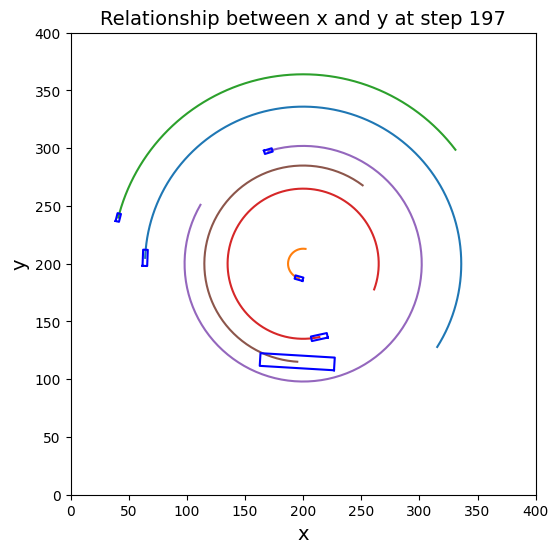

In [4]:
# Visualize dynamic scene
vessels = dsg.get_vessels()
# visualize_dynamic_scene(vessels, folder_path=simulation_folder)
visualize_dynamic_scene_mov = visualize_dynamic_scene_mov(vessels, folder_path=simulation_folder)

Moviepy - Building video ./simulations/0/camera_position.mp4.
Moviepy - Writing video ./simulations/0/camera_position.mp4



Moviepy - Done !
Moviepy - video ready ./simulations/0/camera_position.mp4


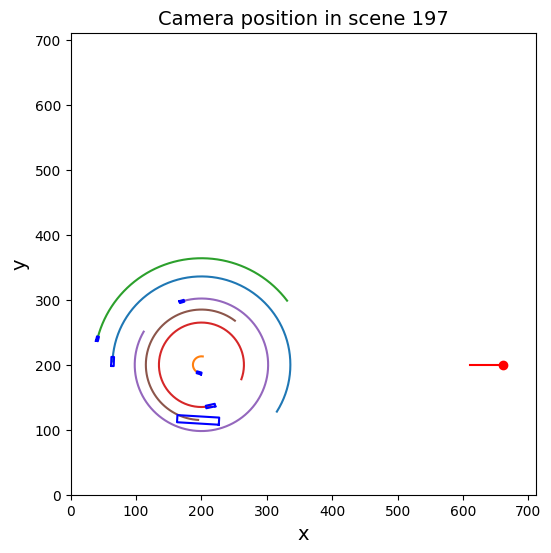

In [5]:

# Create simple legacy camera and place it in the dynamic scene
camera = create_and_place_simple_legacy_camera(dsg.get_larges_radius(), dsg.get_path_centre())

# Visualize the camera position
visualize_camera_pose_in_dsg_mov(camera, vessels, folder_path=simulation_folder)

Moviepy - Building video ./simulations/0/projected_points.mp4.
Moviepy - Writing video ./simulations/0/projected_points.mp4



Moviepy - Done !
Moviepy - video ready ./simulations/0/projected_points.mp4


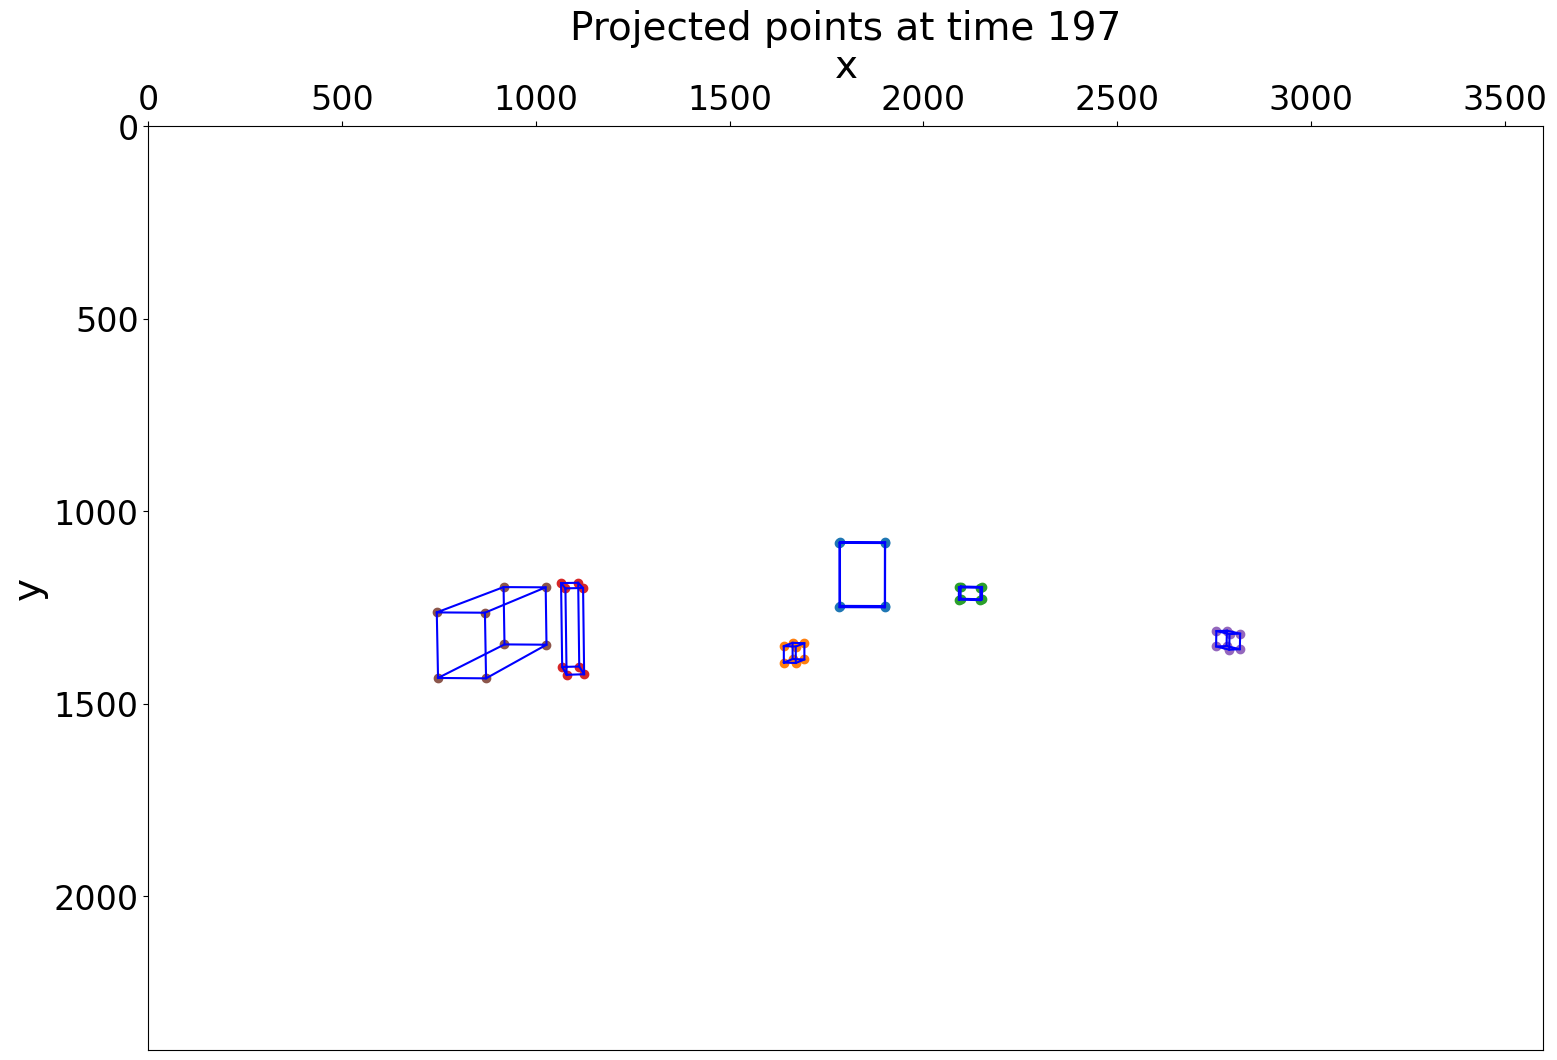

In [6]:
# NOT read from JSON
# all_projected_points = project_all_points(camera, vessels)

# Read from Json
all_projected_points = project_all_points_from_json(camera, simulation_folder, writeToJson=True)

# Visualize projections
visualize_projections_mov(all_projected_points, camera.image_bounds, folder_path=simulation_folder)

In [7]:
# Read projected points from JSON and create bounding boxes
all_bbs = create_all_bbs_from_json(simulation_folder, occlusion=True, writeToJson=True)

Moviepy - Building video ./simulations/0/boundingBoxes.mp4.
Moviepy - Writing video ./simulations/0/boundingBoxes.mp4



Moviepy - Done !
Moviepy - video ready ./simulations/0/boundingBoxes.mp4


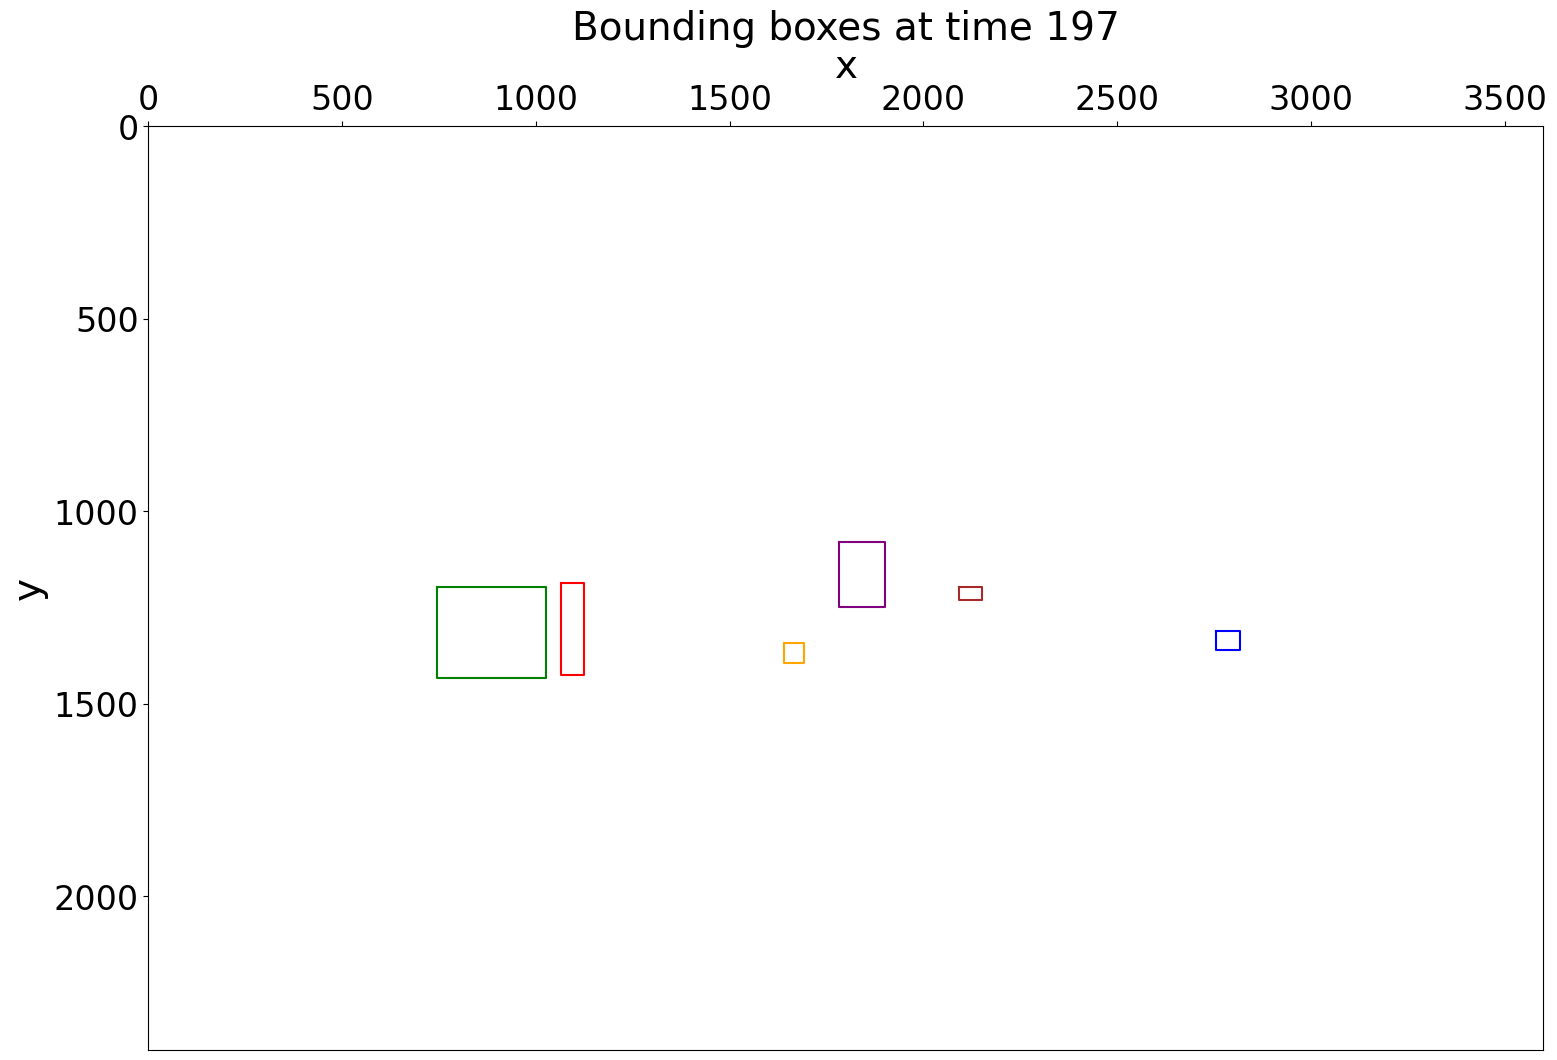

In [8]:
# Visualize BBS
# With points in BBs
# FIX THIS WHEN RIGHT PROJECTED POINTS ARE HERE
# visualize_bounding_boxes(all_bbs, camera.image_bounds, projected_points=all_projected_points, show_projected_points=True, folder_path=simulation_folder)
# Without
visualize_bounding_boxes_mov(all_bbs, camera.image_bounds, folder_path=simulation_folder)

In [9]:
path = 'detector_stats_config.yaml'
errorGenerator = ErrorGenerator(path)
errorBBs = errorGenerator.generate_all_error_BBs(all_bbs)

Moviepy - Building video ./simulations/0/distortedBoundingBoxes.mp4.
Moviepy - Writing video ./simulations/0/distortedBoundingBoxes.mp4



Moviepy - Done !
Moviepy - video ready ./simulations/0/distortedBoundingBoxes.mp4


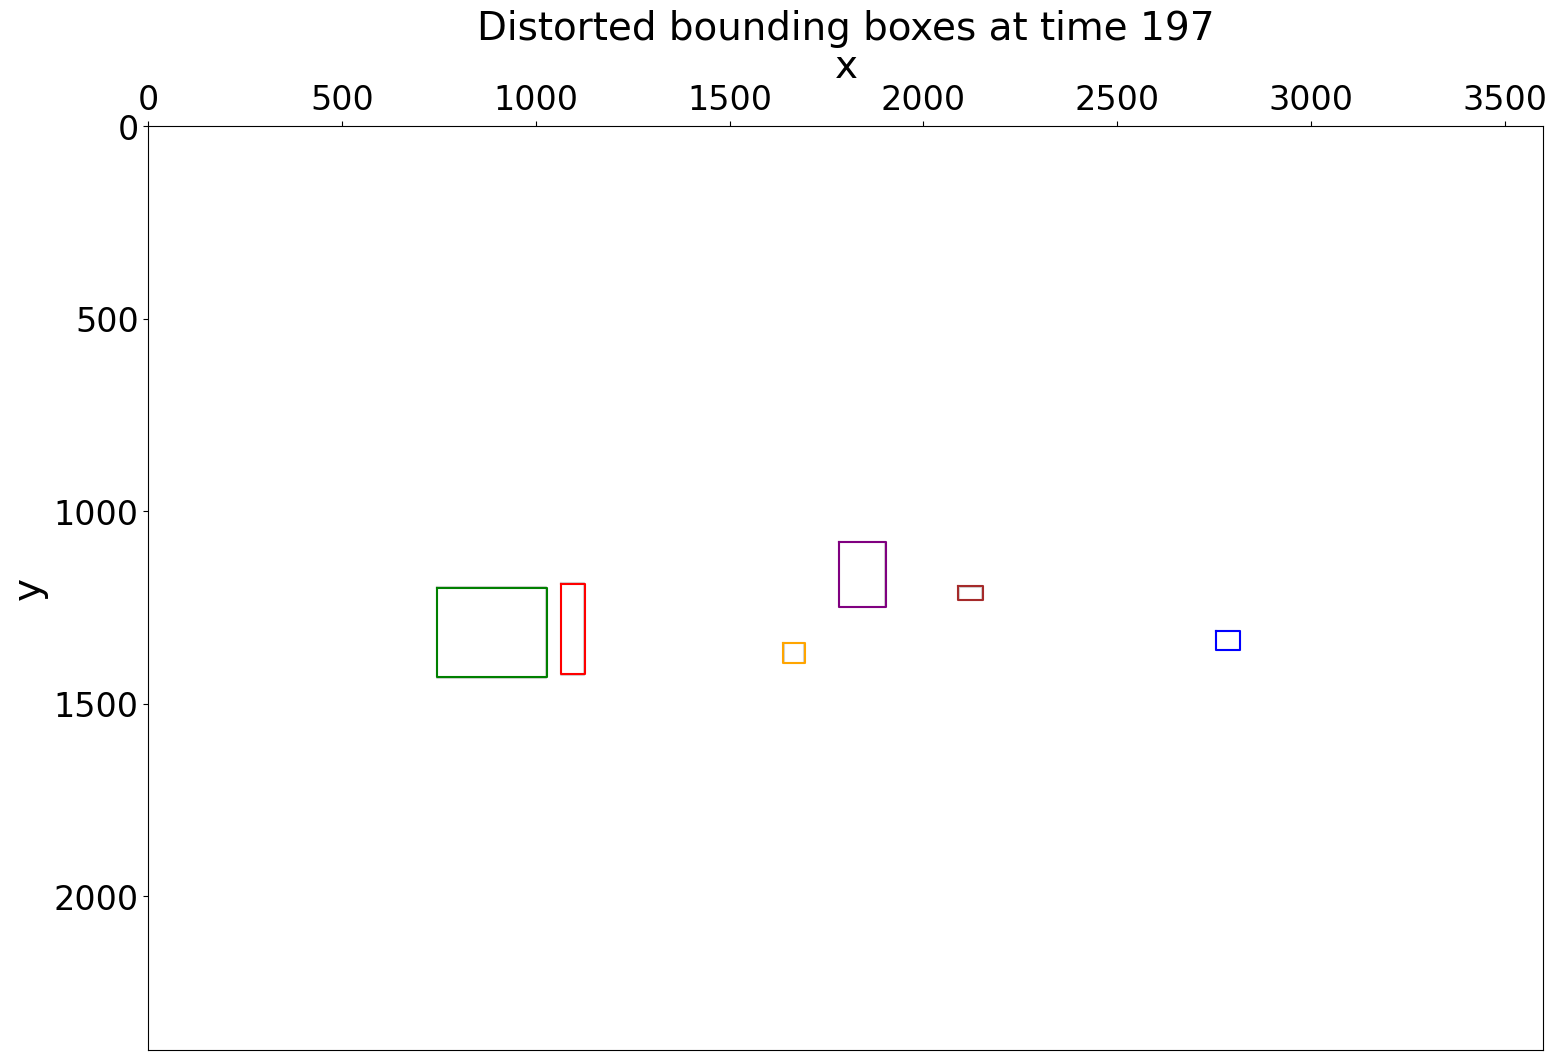

In [10]:

visualize_distorted_bounding_boxes_mov(errorBBs, camera.image_bounds, show_original_BBS=True, original_BBs=all_bbs, folder_path=simulation_folder)